In [1]:
import torch 
import torch.nn as nn
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np

Epoch 5/60,loss:0.3509
Epoch 10/60,loss:0.3463
Epoch 15/60,loss:0.3418
Epoch 20/60,loss:0.3374
Epoch 25/60,loss:0.3331
Epoch 30/60,loss:0.3289
Epoch 35/60,loss:0.3249
Epoch 40/60,loss:0.3209
Epoch 45/60,loss:0.3171
Epoch 50/60,loss:0.3133
Epoch 55/60,loss:0.3096
Epoch 60/60,loss:0.3061


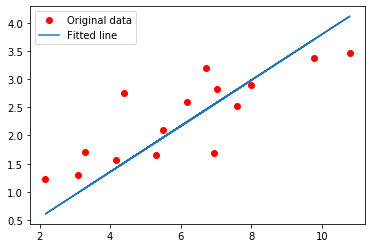

In [2]:
input_size = 1
output_size = 1
num_epoches = 60
learning_rate = 0.01
writer = SummaryWriter(comment="Linear")
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

model = nn.Linear(input_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epoches):
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    output = model(inputs)
    loss = criterion(output, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 保存loss的数据与epoch数值
    writer.add_scalar('Train', loss, epoch)
    if (epoch + 1) % 5 == 0:
        print('Epoch {}/{},loss:{:.4f}'.format(epoch + 1, num_epoches, loss.item()))

# 将model保存为graph
writer.add_graph(model, (inputs,))

predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()
writer.close()

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 96, kernel_size=11)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=5)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3)
        self.conv4 = nn.Conv2d(384, 384, kernel_size=3)
        self.conv5 = nn.Conv2d(384, 256, kernel_size=3)

        self.fc1 = nn.Linear(6*6*256, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, 10)
        
        self.bn1 = nn.BatchNorm2d(96)
        self.bn2 = nn.BatchNorm2d(256)
        self.bn3 = nn.BatchNorm2d(384)
        
        self.drop = nn.Dropout2d()
        
    def forward(self, x):
        x = F.max_pool2d(self.bn1(F.relu(self.conv1(x))), 2)
        x = F.max_pool2d(self.bn2(F.relu(self.conv2(x))), 2)
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.bn3(F.relu(self.conv4(x)))
        x = F.max_pool2d(self.bn2(F.relu(self.conv5(x))), 2)
        x = x.view(x.shape[0], -1)
        x = self.drop(self.fc1(x))
        x = self.drop(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [2]:
for i in range(10):
    print (i)
print (i)

0
1
2
3
4
5
6
7
8
9
9
